# Question 1 

## a)Cryptocurrency selected: Solana USD (SOL-USD)
----------
## b)Download of SOL-USD historical daily data via yfinance:

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
from mpl_toolkits.mplot3d import Axes3D

In [147]:
data=yf.download("SOL-USD", start="2022-03-31", end="2023-04-01")

[*********************100%***********************]  1 of 1 completed


In [148]:
print(len(data))                                                        #to confirm that a 1 year period of data was extracted 

366


In [149]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-31,120.681557,128.930115,120.197830,122.661461,122.661461,4115229587
2022-04-01,122.736107,137.558411,118.787910,134.430939,134.430939,4434807484
2022-04-02,134.453583,143.020020,132.139191,132.198868,132.198868,3394186456
2022-04-03,132.241074,140.263702,131.226151,136.775330,136.775330,2585967812
2022-04-04,136.760788,137.633514,126.865326,132.412628,132.412628,2828117206


In [150]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-27,20.976086,20.979824,19.508055,19.921675,19.921675,359607077
2023-03-28,19.922195,20.764208,19.665567,20.470697,20.470697,347656506
2023-03-29,20.465441,21.505144,20.458122,21.111467,21.111467,378726667
2023-03-30,21.113840,21.590513,20.232969,20.551046,20.551046,472449267
2023-03-31,20.552515,21.441999,20.155243,21.170496,21.170496,352864960


----------
## c) Movement of SOL-USD over the year:

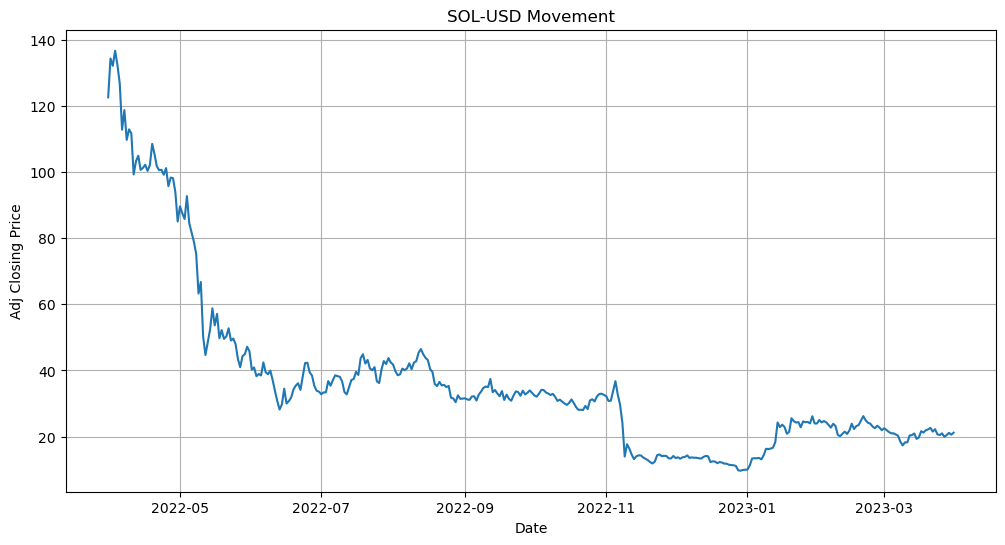

In [151]:
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adj Closing Price')
plt.title('SOL-USD Movement')
plt.grid()
plt.show()

## c)Annualized Volatility (use 6 months data):

In [152]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [153]:
vol = np.sqrt(365) * log_return[-183:-1].std()                              #we capture six month data from the 183 row to the last [-183:-1]
print('The annualised volatility is', round(vol*100,2), '%')                #we consider 365 days which is the number of trading days for crypto and desconsider 366 which the number of rows that the data has 

The annualised volatility is 137.89 %


# Question 2 

## a)Designing a call option and its pricing value  

In [154]:
#S: spot price;                          the spot price will be the current price at the date of extraction $ 20.38 
#K: strike price;                        the strike price will be at 10% higher than the spot price $ 22.418
#T: time to maturity;                    we will be designing an option with 3 months time to maturity  3/12=1/4=0.25
#r: risk free rate;                      the risk free rate for 10y is 3.48%
#vol: volatility of underlying asse;     the volatily is 137.89%
#q: dividend;                            which will not be included because cryptos do not pay dividend
#payoff: call or put;                    in this case it will be a call


### Black Scholes Model 

In [155]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
        
    return option_value

In [156]:
euro_option_bs(20.38, 22.41,0.25,0.0348,1.3789,'call')


4.869199118909832

In [157]:
S = np.linspace(1,50,80)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i],22.41,0.25,0.0348,1.3789,'call')

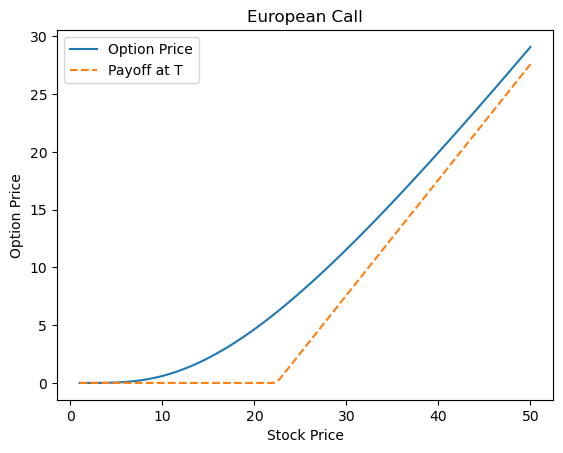

In [158]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-22.41,0),'--')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

In [159]:
K = np.linspace(1,50,80)
cp = np.zeros((len(K),1))
for i in range(len(K)):
    cp[i] = euro_option_bs(20.38,K[i],0.25,0.0348,1.3789,'call')

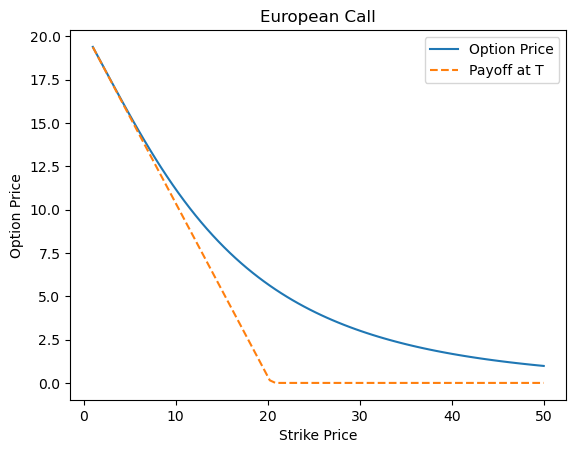

In [160]:
fig = plt.figure()
plt.plot(K, cp, '-')
plt.plot(K, np.maximum(20.38-K,0),'--')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

### Monte Carlo 

In [161]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [162]:
T =0.25                            #(S, K, T, r, vol, payoff):
r = 0.0348                         #(20.38, 22.41,0.25,0.0348,1.3789,'call')
sigma = 1.3789
S0 = 20.38
K = 22.41

In [163]:
S = mcs_simulation_np(1000)

In [164]:
S = np.transpose(S)
S

array([[20.38      , 20.88586954, 20.73935662, ..., 11.42232886,
        11.59683468, 11.39445666],
       [20.38      , 20.0571    , 19.97800365, ..., 58.99879634,
        59.60640725, 60.31615142],
       [20.38      , 20.00875268, 20.37972369, ..., 43.22224195,
        43.31117527, 42.3796542 ],
       ...,
       [20.38      , 20.21843805, 20.8426552 , ..., 29.98674905,
        30.30263163, 30.31988646],
       [20.38      , 19.90497454, 19.91816526, ..., 21.84543333,
        21.41962185, 21.47617766],
       [20.38      , 20.64218718, 21.22043202, ..., 16.79424042,
        16.74526075, 16.52553219]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

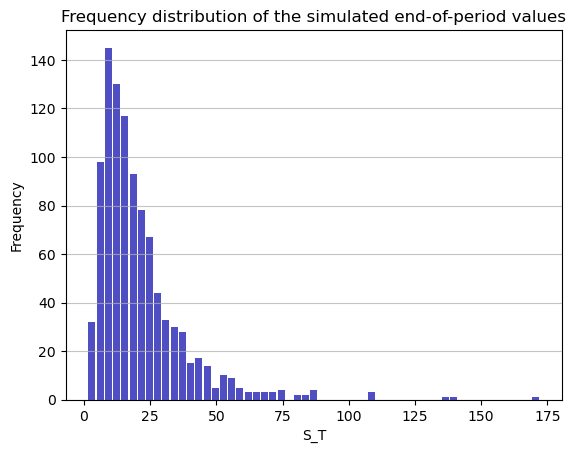

In [165]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [166]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call is $', str(c))

European call is $ 5.229277546796508


### The final price chosen for the call option is $ 5.044 (the average between the value from the Black Scholes and Monte Carlo Simulation
--------

# Question 3 

## a) Calculate Greeks 

### Delta

In [282]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
      
    return delta

#(S, K, T, r, q, vol, payoff)
#(20.38, 22.41,0.25,0.0348,0,1.3789,'call')

In [283]:
delta(20.38, 22.41,0.25,0.0348,0,1.3789,'call')   #This means that for every 1 unit increase in the underlying asset price, the price of the call option will increase by approximately 0.5869, assuming all other parameters remain constant. Alternatively, the delta can be interpreted as the probability of the option expiring in the money, with a delta of 0.5869 implying a 58.69% chance of the option expiring in the money.

0.586916658941796

In [304]:
S = np.linspace(1,60,100)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i],22.41,0.25,0.0348,0,1.3789,'call')

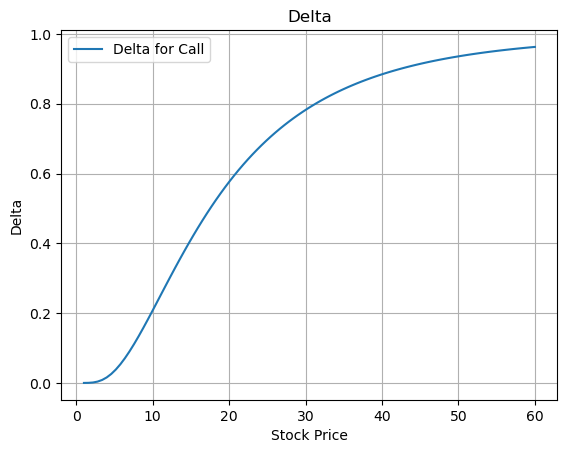

In [305]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

### Gamma 

In [286]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [287]:
gamma(20.38, 22.41,0.25,0.0348,0,1.3789,'call')  #This means that for every 1% increase in the underlying asset price, the delta of the option will increase by 0.0274, assuming all other parameters remain constant.

0.027715926856309907

In [306]:
S = np.linspace(1,60,100)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],22.41,0.25,0.0348,0,1.3789,'call')

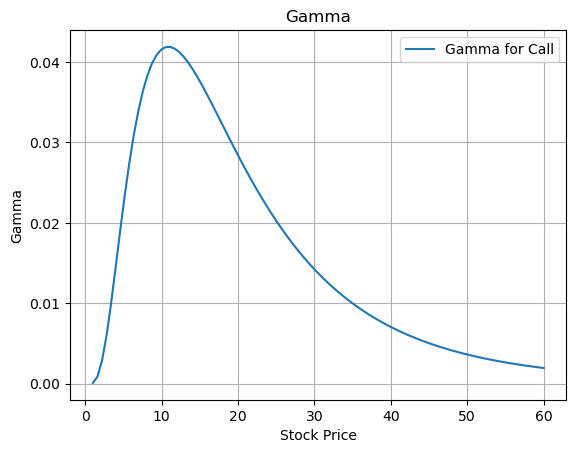

In [307]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])                                             #same for put as well

### Speed 

In [290]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [291]:
speed(20.38, 22.41,0.25,0.0348,0,1.3789,'call')  #same for pu as well

-0.0008965820628951422

In [308]:
S = np.linspace(1,60,100)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 22.41,0.25,0.0348,0,1.3789,'call')

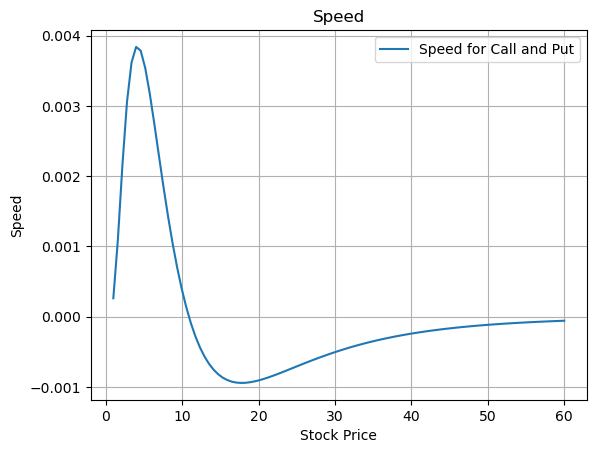

In [309]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

### Theta

In [294]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return theta

In [295]:
theta(20.38, 22.41,0.25,0.0348,0,1.3789,'call')

11.190737424500796

In [296]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(20.38, 22.41,T[i],0.0348,0,1.3789,'call')
 

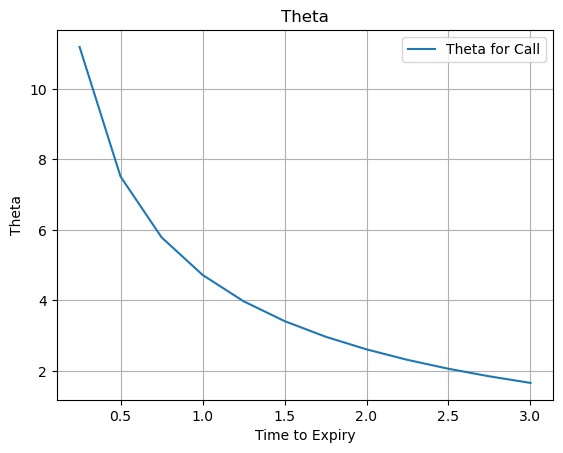

In [310]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

### Rho

In [298]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return rho

In [299]:
rho(20.38, 22.41,0.25,0.0348,0,1.3789,'call')

1.7730405975809924

In [300]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(20.38, 22.41,0.25,r[i],0,1.3789,'call')

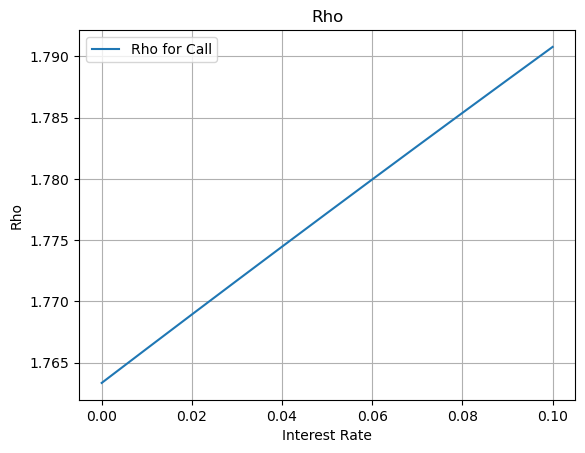

In [301]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [ ]:
# Conclusion/Summary in the PDF document 